# HW #3: Unsupervised Learning Practice

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

In [2]:
# Loarding data set
X = pd.read_csv("winequality-red.csv", sep=';', dtype='float64')
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [3]:
# Check the descripton of data
X.describe().round()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


In [4]:
# Scaling data
SX = pd.DataFrame(scale(X), index=X.index, columns=X.columns)
SX.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


### 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

Text(0.5, 1.0, 'Elbow curve')

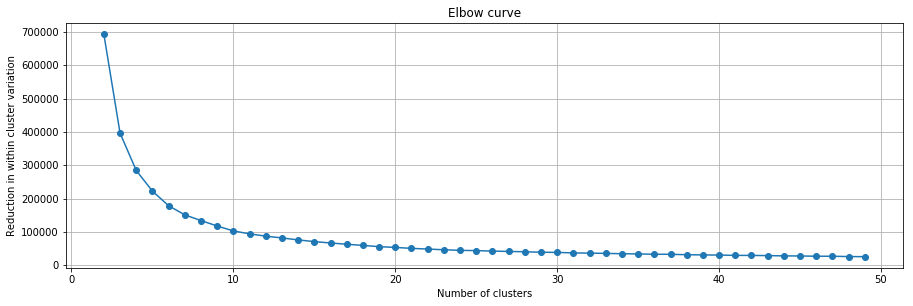

In [5]:
# See the within cluster variation for unscaled data
within_cluster_variance = []

for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 4.5))
plt.plot(range(2, 50), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.title('Elbow curve') 

Text(0.5, 1.0, 'Elbow curve')

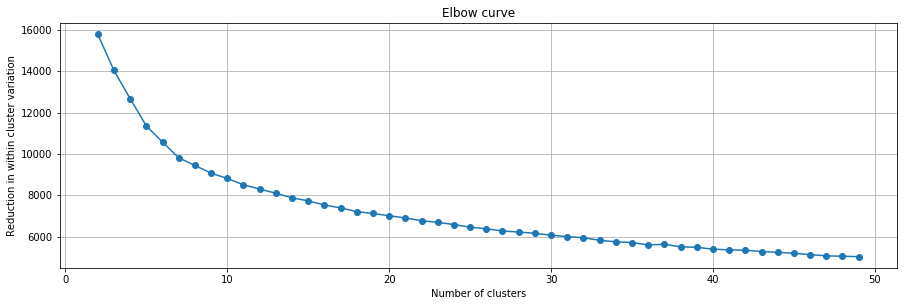

In [6]:
# See the within cluster variation for scaled data
within_cluster_variance = []

for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(SX)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 4.5))
plt.plot(range(2, 50), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.title('Elbow curve') 

**Comment:** For either scaled or unscaled data, the within cluster varidation would reduce a lot in first a few clusters. Thus, I want to choose 3 clusters to examine the features in wines.

In [7]:
# See the features associated with wine quality in 3 clusters for the unscaled data
X = pd.read_csv("winequality-red.csv", sep=';', dtype='float64')

km1 = KMeans(n_clusters=3).fit(X)
X = pd.DataFrame(X, index=X.index, columns=X.columns)
X['cluster'] = km1.labels_

display((X.groupby('cluster').mean().sort_values(by=['quality'])))
X.groupby('cluster').size()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
1,7.887552,0.572365,0.275643,3.232365,0.088398,26.151452,108.506224,0.996935,3.289627,0.652033,10.008921,5.307054
2,8.286996,0.520504,0.272436,2.497070,0.091310,21.570513,54.888278,0.996856,3.320201,0.677106,10.376801,5.628205
0,8.469828,0.519520,0.268608,2.361022,0.084606,8.995074,22.392857,0.996618,3.311379,0.647217,10.576929,5.738916


cluster
0    812
1    241
2    546
dtype: int64

**Comment:** The variables that clearly cluster with higher values of wine quality: fixed acidity and alcohol. The variables that clearly cluster with lower values of wine quality: volatile acidity, residual sugar, free sulfur dioxide, and total sulfur dioxide. However, since this analysis is based on the unscaled data, we should look at the case of scaled data below.

In [8]:
# See the features associated with wine quality in 3 clusters for the scaled data
X = pd.read_csv("winequality-red.csv", sep=';', dtype='float64')
SX = pd.DataFrame(scale(X), index=X.index, columns=X.columns)

km2 = KMeans(n_clusters=3).fit(SX)
SX['cluster'] = km2.labels_

display((SX.groupby('cluster').mean().sort_values(by=['quality'])))
SX.groupby('cluster').size()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
2,-0.064045,0.050084,0.099918,0.361867,-0.002867,1.024745,1.267761,0.296404,-0.171839,-0.181772,-0.546743,-0.437077
0,-0.646621,0.498127,-0.781045,-0.228904,-0.172255,-0.261240,-0.372202,-0.427385,0.620225,-0.321298,0.032046,-0.159665
1,0.948582,-0.731324,1.008170,0.037305,0.241678,-0.432296,-0.466686,0.364027,-0.728786,0.587733,0.379856,0.561225


cluster
0    702
1    505
2    392
dtype: int64

**Comment:** The variables that clearly cluster with higher values of wine quality: alcohol. The variables that clearly cluster with lower values of wine quality: volatile acidity, free sulfur dioxide, and total sulfur dioxide.

### If you want to make good bottle of wine, what characteristics are most important according to this analysis?

From only this analysis, I would say that higer alcohol and lower volatile acidity, free sulfur dioxide, and total sulfur dioxide seem to be important for the good quality of wines, because these features could be associated with quality of wines in the k-means clustering for scaled data.

### 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1. Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

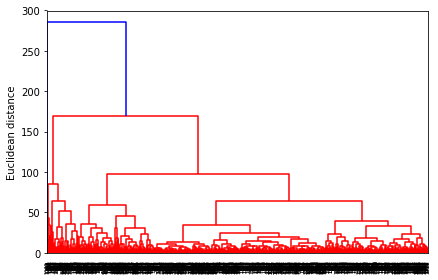

In [9]:
# See the dendrogram for the unscaled data
row_clusters = linkage(pdist(X, metric='euclidean'), method='complete')
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [10]:
# See the features associated with wine quality in 3 clusters for the unscaled data
X = pd.read_csv("winequality-red.csv", sep=';', dtype='float64')

ac1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(X)
X['cluster'] = ac1.labels_

display((X.groupby('cluster').mean().sort_values(by=['quality'])))
X.groupby('cluster').size()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
2,7.935385,0.549846,0.297462,3.308077,0.089308,28.657692,121.292308,0.996934,3.250923,0.686462,9.962308,5.192308
0,8.354260,0.526179,0.268071,2.462781,0.087354,14.712679,39.513974,0.996735,3.316858,0.655842,10.461247,5.673483
1,7.900000,0.300000,0.680000,8.300000,0.050000,37.500000,283.500000,0.993160,3.010000,0.510000,12.300000,7.000000


cluster
0    1467
1       2
2     130
dtype: int64

**Comment:** The variables that clearly cluster with higher values of wine quality: alcohol. The variables that clearly cluster with lower values of wine quality: volatile acidity, chlorides, and sulphates. However, since the number of clusters associated with the highest quality is just 2, it may not a reliable result. And also, I should look at the result for the scaled data rather than that for the unscaled data.

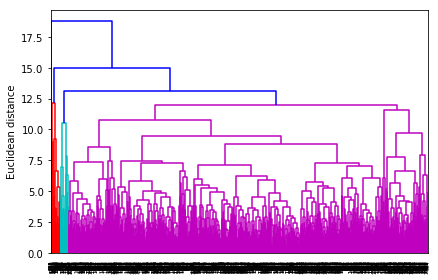

In [11]:
# See the dendrogram for the scaled data
row_clusters = linkage(pdist(SX, metric='euclidean'), method='complete')
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [12]:
# See the features associated with wine quality in 3 clusters for the scaled data
X = pd.read_csv("winequality-red.csv", sep=';', dtype='float64')
SX = pd.DataFrame(scale(X), index=X.index, columns=X.columns)

ac2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(SX)
SX['cluster'] = ac2.labels_

display((SX.groupby('cluster').mean().sort_values(by=['quality'])))
SX.groupby('cluster').size()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
1,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
0,-0.001252,0.007812,-0.011733,-0.066281,-0.018035,-0.014593,-0.015860,-0.014375,0.009877,-0.006656,0.003986,-0.001216
2,0.114396,-0.728032,0.768457,6.544008,0.392577,1.392631,1.527129,1.324144,-0.642992,-0.059154,-0.273842,0.296014


cluster
0    1581
1       2
2      16
dtype: int64

**Comment:** The variables that clearly cluster with higher values of wine quality: none. The variables that clearly cluster with lower values of wine quality: sulphates. However, since the number of clusters associated with the lowest quality is just 2, it may not a reliable result.

### If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering?

From only this analysis, I would say that lower sulphates seems to be important for the good quality of wines, because this feature could be associated with quality of wines in the Hierarchical clustering for the scaled data, which is different from the results in k-means clustering.

In [10]:
# Reference: See the features associated with wine quality in 5 clusters for the scaled data
X = pd.read_csv("winequality-red.csv", sep=';', dtype='float64')
SX = pd.DataFrame(scale(X), index=X.index, columns=X.columns)

ac3 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete').fit(SX)
SX['cluster'] = ac3.labels_

display((SX.groupby('cluster').mean().sort_values(by=['quality'])))
SX.groupby('cluster').size()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
1,-0.088200,0.035595,-0.090699,-0.064045,-0.133744,0.005247,-0.019843,-0.077709,0.111066,-0.140651,0.030863,-0.010170
2,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719
0,1.117620,-0.349720,1.004432,-0.095057,1.470947,-0.269898,0.035390,0.800639,-1.292270,1.717645,-0.341875,0.114017
4,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629


cluster
0     114
1    1467
2      13
3       2
4       3
dtype: int64

**Comment:** Although the number of clusters is now fixed as 3 to compare with question 1, we can see the case of 5 clusters just for references. The 2 clusters associated with lowest quality and highest quality (cluster 3 and 4) might be ignored in this case because both clusters have only 2 or 3 samples. Thus, we may only look at cluster 1, 2, 0. In this case, we can find that fixed acidity, citric acid, chlorides, and sulphates cluster with higher values of wine quality. However, I'm not sure about whether I should actually ignore the 2 clusters associated with lowest quality and highest quality (cluster 3 and 4).

### 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components.

In [13]:
# Implement PCA
X = pd.read_csv("winequality-red.csv", sep=';', dtype='float64')
SX = pd.DataFrame(scale(X), index=X.index, columns=X.columns)

pca = PCA()
df = pd.DataFrame(pca.fit_transform(SX), 
                  columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714,0.587342,-0.565736,0.048784,-0.139565
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687,0.546495,-0.162065,-0.199140,-0.120391
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816,-0.506212,0.241135,-0.107616,0.319764
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362


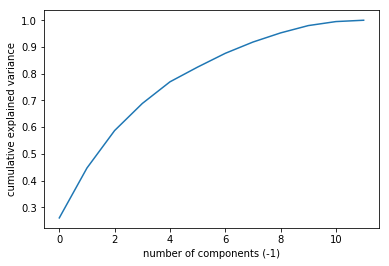

In [14]:
# See the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components (-1)')
plt.ylabel('cumulative explained variance');

In [15]:
np.cumsum(pca.explained_variance_ratio_) #0.44692081

array([0.26009731, 0.44692081, 0.58716412, 0.68841586, 0.76952116,
       0.82473718, 0.87626366, 0.91841971, 0.95269534, 0.98002195,
       0.99504017, 1.        ])

**Comment:** From this result, I can say that around 44.7% of the variation is explained by the first two principal components.

### How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

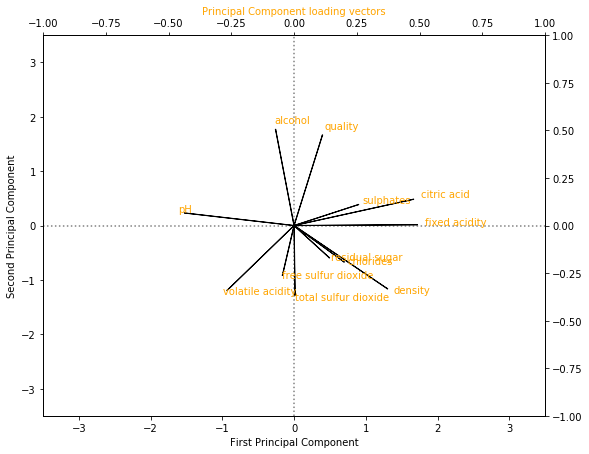

In [16]:
# Try visualization
pca_loadings = pd.DataFrame(PCA().fit(SX).components_.T, index=SX.columns, 
                            columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'])

fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
ax2.arrow(0,0,pca_loadings.V1[4], -pca_loadings.V2[4])
ax2.arrow(0,0,pca_loadings.V1[5], -pca_loadings.V2[5])
ax2.arrow(0,0,pca_loadings.V1[6], -pca_loadings.V2[6])
ax2.arrow(0,0,pca_loadings.V1[7], -pca_loadings.V2[7])
ax2.arrow(0,0,pca_loadings.V1[8], -pca_loadings.V2[8])
ax2.arrow(0,0,pca_loadings.V1[9], -pca_loadings.V2[9])
ax2.arrow(0,0,pca_loadings.V1[10], -pca_loadings.V2[10])
ax2.arrow(0,0,pca_loadings.V1[11], -pca_loadings.V2[11]);

**Comment:** Since around 44.7% of the variation is explained by the first two principal components, we can use the first two principal components to predict some other variables tied to wine such as price, even though more than half of information would be reduced by PCA. And, as we can see the vectors in the graph above, original 12 features in wine data could be preserved somewhat in the first two principal components.

**Comment:** For example, if we want to make a prediction for the wine price using the first two principal components, we need the dataset where the wine prices are associated with these two components, treating wine price as a dependent variable and two components as independent variables. After splitting the data into training data and test data, we can fit the training data into any supervised learning model such as K-Nearest Neighbors Regression, (Ridge or Lasso) Linear Regression, (Bagging or Boosting) Decision Tree Regression, and Random Forest Regression. And then, we can test the goodness of fit by using test data (or cross-validation) based on the metrics such as R-squared.